In [1]:
!pip install -q catboost
!pip install -q pycaret
!pip install -q optuna
!pip install -q pycaret[tuners]
!pip uninstall packaging
!pip install packaging
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.1 MB/s eta 0:00

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as spst
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,mean_absolute_percentage_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.impute import KNNImputer
# from workalendar.asia import SouthKorea
# cal = SouthKorea()
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
data = pd.read_csv("/content/drive/MyDrive/dacon/흡연/train.csv")
test = pd.read_csv("/content/drive/MyDrive/dacon/흡연/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/dacon/흡연/sample_submission.csv")

In [ ]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB


In [ ]:
data['label'].value_counts()

0    4429
1    2571
Name: label, dtype: int64

In [ ]:
data['충치'].value_counts()

0    5408
1    1592
Name: 충치, dtype: int64

In [ ]:
data['요 단백'].value_counts()

1    6618
2     231
3     107
4      34
5      10
Name: 요 단백, dtype: int64

In [ ]:
import scipy.stats as spst
table = pd.crosstab(data['label'],data['나이'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=255.77288887004113, pvalue=4.0445726823223827e-47, dof=13, expected_freq=array([[1.27175571e+02, 2.88517714e+02, 3.36604000e+02, 3.66974286e+02,
        1.20468800e+03, 5.70708286e+02, 4.31511143e+02, 3.94181000e+02,
        4.59350571e+02, 1.06296000e+02, 7.40275714e+01, 4.87190000e+01,
        1.83487143e+01, 1.89814286e+00],
       [7.38244286e+01, 1.67482286e+02, 1.95396000e+02, 2.13025714e+02,
        6.99312000e+02, 3.31291714e+02, 2.50488857e+02, 2.28819000e+02,
        2.66649429e+02, 6.17040000e+01, 4.29724286e+01, 2.82810000e+01,
        1.06512857e+01, 1.10185714e+00]]))

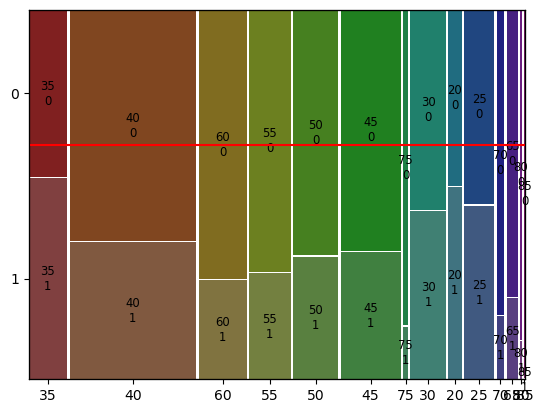

In [ ]:
mosaic(data, [ '나이','label'])
plt.axhline(1- data['label'].mean(),color = 'r')
plt.show()

In [ ]:
table = pd.crosstab(data['label'],data['충치'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=67.38566768794314, pvalue=2.2326611038095596e-16, dof=1, expected_freq=array([[3421.71885714, 1007.28114286],
       [1986.28114286,  584.71885714]]))

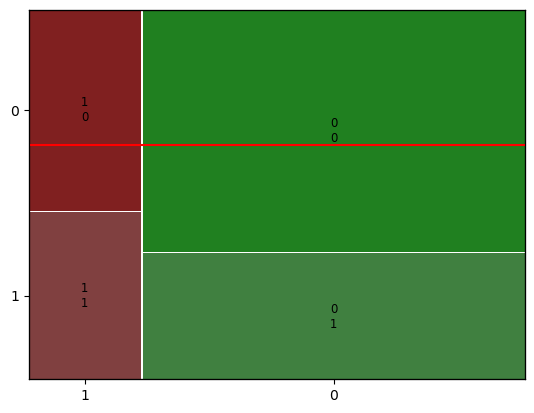

In [ ]:
mosaic(data, [ '충치','label'])
plt.axhline(1- data['label'].mean(),color = 'r')
plt.show()

In [ ]:
table = pd.crosstab(data['label'],data['요 단백'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=3.6264339007145683, pvalue=0.45891590480965294, dof=4, expected_freq=array([[4.18730314e+03, 1.46157000e+02, 6.77004286e+01, 2.15122857e+01,
        6.32714286e+00],
       [2.43069686e+03, 8.48430000e+01, 3.92995714e+01, 1.24877143e+01,
        3.67285714e+00]]))

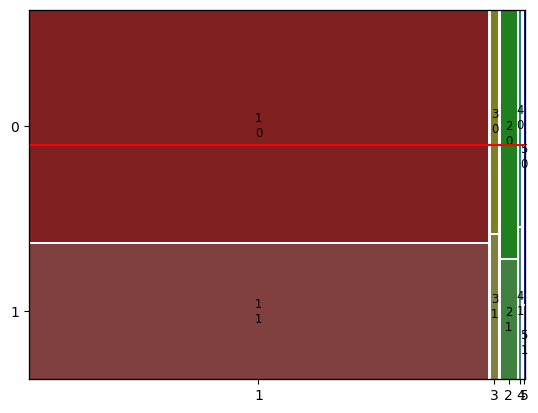

In [ ]:
mosaic(data, [ '요 단백','label'])
plt.axhline(1- data['label'].mean(),color = 'r')
plt.show()

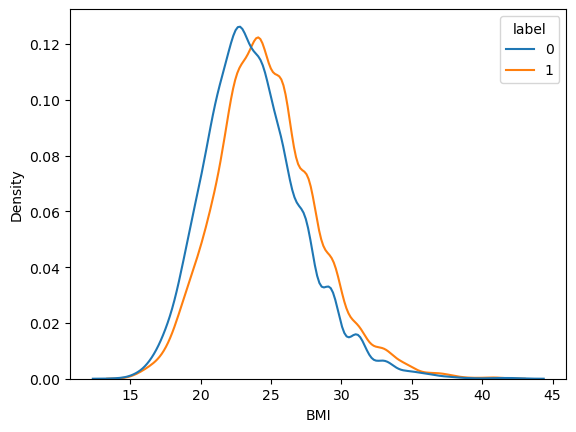

In [ ]:
sns.kdeplot(x= 'BMI', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


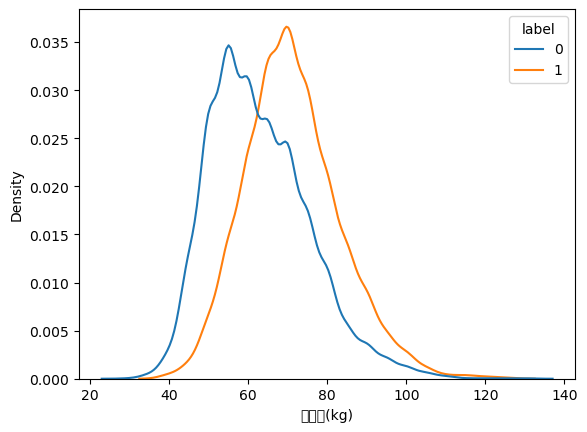

In [ ]:
sns.kdeplot(x= '몸무게(kg)', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


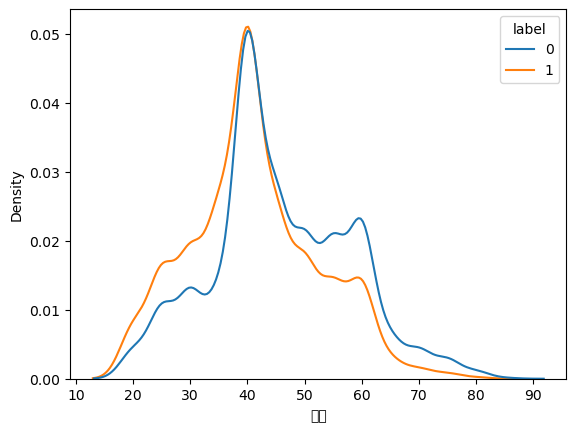

In [ ]:
sns.kdeplot(x= '나이', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


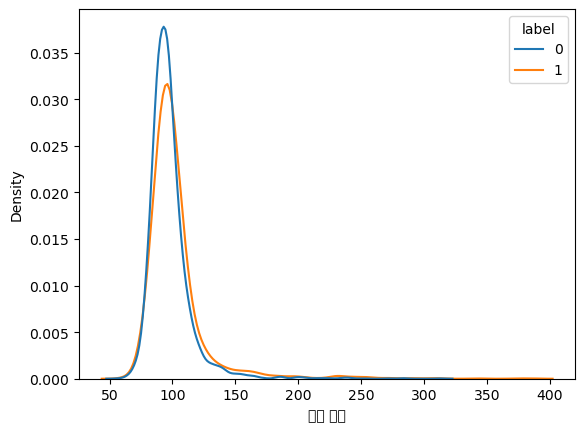

In [ ]:
sns.kdeplot(x= '공복 혈당', data = data, hue = 'label', common_norm = False)
plt.show()

In [ ]:
import statsmodels.api as sm
model=sm.Logit(data['label'], data['공복 혈당'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.664669
         Iterations 4
공복 혈당    1.825326e-85
dtype: float64


In [ ]:
import statsmodels.api as sm
model=sm.Logit(data['label'], data['나이'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.647074
         Iterations 4
나이    4.983397e-134
dtype: float64


In [ ]:
model=sm.Logit(data['label'], data['BMI'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.662753
         Iterations 4
BMI    1.817061e-91
dtype: float64


In [ ]:
model=sm.Logit(data['label'], data['요 단백'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.660699
         Iterations 4
요 단백    5.102017e-94
dtype: float64


In [ ]:
model=sm.Logit(data['label'], data['콜레스테롤'])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.658190
         Iterations 4
콜레스테롤    3.348267e-104
dtype: float64


C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47204 (\N{HANGUL SYLLABLE ROL}) m

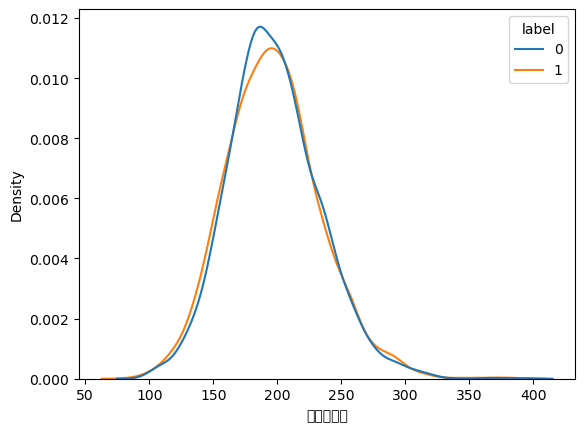

In [ ]:
sns.kdeplot(x= '콜레스테롤', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}

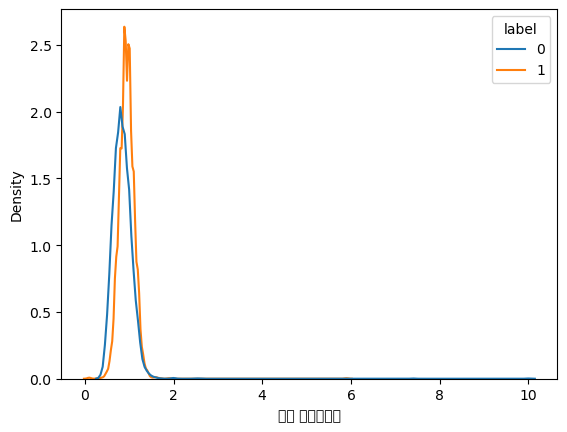

In [ ]:
sns.kdeplot(x= '혈청 크레아티닌', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


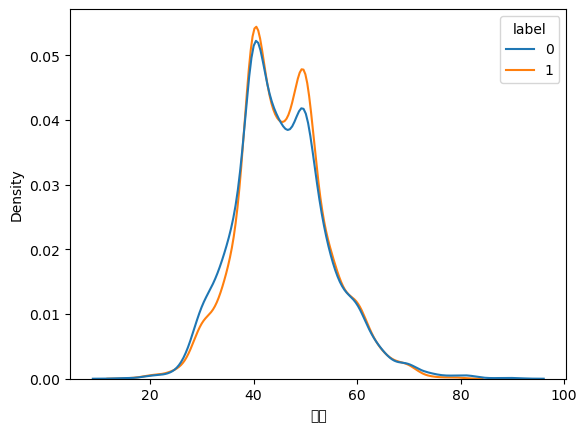

In [ ]:
sns.kdeplot(x= '혈압', data = data, hue = 'label', common_norm = False)
plt.show()

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


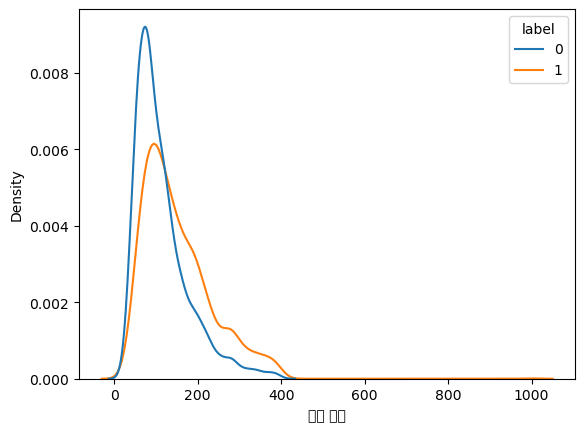

In [ ]:
sns.kdeplot(x= '중성 지방', data = data, hue = 'label', common_norm = False)
plt.show()

In [ ]:
x = data.drop(['label','ID'], axis=1)
y = data.loc[:, 'label']

C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) miss

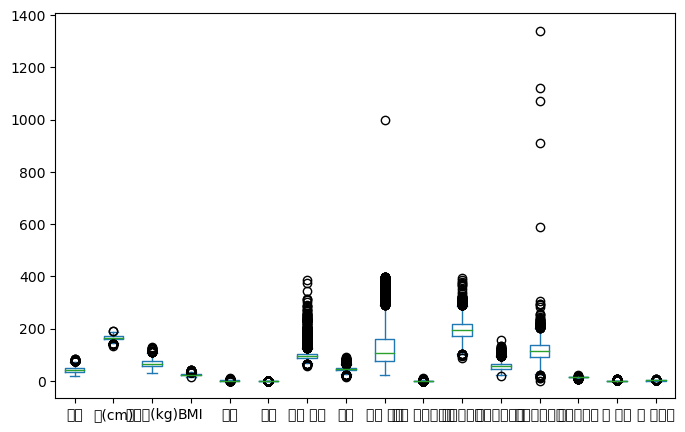

In [ ]:
x.plot(kind='box', figsize=(8, 5))
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = x.columns
vif['vif_factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# VIF 기준으로 정렬렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인인
vif

,feature,vif_factor
0,키(cm),315.630674
1,몸무게(kg),195.149376
2,BMI,194.794650
3,헤모글로빈,151.491537
4,콜레스테롤,97.494695
5,고밀도지단백,30.192986
6,혈압,29.768727
7,공복 혈당,26.190563
8,저밀도지단백,23.370535
9,나이,21.502304


In [5]:
#############################################################################################################################################
data['비만'] = pd.cut(data['BMI'], bins =[0,18.5, 23, 25,30,35,100] , labels = [0,1,2,3,4,5])

In [6]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2


C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dufwn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


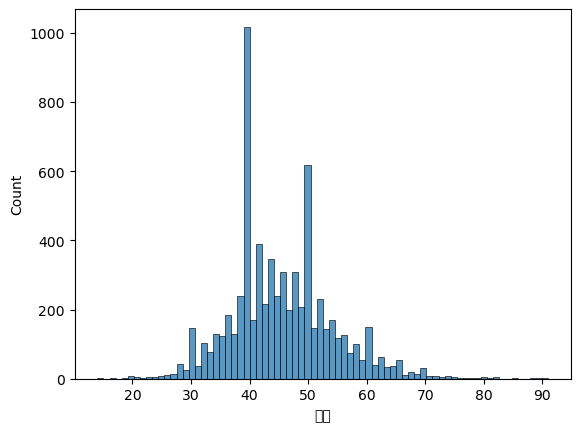

In [ ]:
sns.histplot(data['혈압'])
plt.show()

In [7]:
data['당뇨'] = pd.cut(data['공복 혈당'], bins =[0,100, 125,10000] , labels = [0,1,2])

In [ ]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0


In [8]:
data['TG'] = pd.cut(data['중성 지방'], bins =[0,150, 200,10000] , labels = [0,1,2])

In [ ]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,...,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,...,211,75,120,15.9,1,1.53,1,2,0,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,...,251,46,184,11.8,1,1.45,0,2,2,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,...,144,43,89,15.3,1,1.04,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,...,178,66,110,13.4,1,1.18,0,1,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,...,232,62,151,13.8,1,1.32,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,...,184,44,112,14.9,1,1.50,0,1,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,...,184,64,103,14.3,1,1.47,1,2,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,...,178,54,107,15.6,1,1.00,0,4,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,...,157,49,76,14.4,1,1.00,0,2,0,1


In [ ]:
data['비만'].value_counts()

1    2734
3    2093
2    1580
4     322
0     230
5      41
Name: 비만, dtype: int64

In [ ]:
table = pd.crosstab(data['label'],data['비만'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=116.89833458756814, pvalue=1.423893357207484e-23, dof=5, expected_freq=array([[ 145.52428571, 1729.84085714,  999.68857143, 1324.271     ,
         203.734     ,   25.94128571],
       [  84.47571429, 1004.15914286,  580.31142857,  768.729     ,
         118.266     ,   15.05871429]]))

In [ ]:
table = pd.crosstab(data['label'],data['당뇨'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=74.7856815588675, pvalue=5.760969643727827e-17, dof=2, expected_freq=array([[2964.26642857, 1207.85157143,  256.882     ],
       [1720.73357143,  701.14842857,  149.118     ]]))

In [ ]:
table = pd.crosstab(data['label'],data['TG'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=327.36801461387427, pvalue=8.18349555366308e-72, dof=2, expected_freq=array([[3165.46957143,  603.60942857,  659.921     ],
       [1837.53042857,  350.39057143,  383.079     ]]))

In [ ]:
data['당뇨'].value_counts()

0    4685
1    1909
2     406
Name: 당뇨, dtype: int64

In [9]:
pd.options.display.max_columns = 50
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1


In [ ]:
data['Cr'] = pd.cut(data['혈청 크레아티닌'], bins =[0,1.4,10000] , labels = [0,1])

In [ ]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Cr
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,0


In [ ]:
data['Cr'].value_counts()

0    6971
1      29
Name: Cr, dtype: int64

In [ ]:
table = pd.crosstab(data['label'],data['Cr'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=0.6895876405353158, pvalue=0.40630467486466415, dof=1, expected_freq=array([[4410.65128571,   18.34871429],
       [2560.34871429,   10.65128571]]))

In [ ]:
data = data.drop('Cr',axis=1)
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1


In [ ]:
data['Total Cholesterol'] = pd.cut(data['콜레스테롤'], bins =[0,200,240,10000] , labels = [0,1,2])

In [ ]:
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Total Cholesterol
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,2
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,0


In [ ]:
table = pd.crosstab(data['label'],data['Total Cholesterol'])
spst.chi2_contingency(table)

Chi2ContingencyResult(statistic=0.0900275920894098, pvalue=0.9559842929400802, dof=2, expected_freq=array([[2482.77085714, 1434.36328571,  511.86585714],
       [1441.22914286,  832.63671429,  297.13414286]]))

In [10]:
data = data.rename(columns={'고밀도지단백':'HDL','저밀도지단백':'LDL'})
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1


In [ ]:
data['t'] = data['HDL'] + data['LDL'] + (data['중성 지방']/5)
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Total Cholesterol,t
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,1,211.0
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,2,250.8
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,0,144.2
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,0,185.2
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,1,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,0,184.2
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,0,183.4
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,0,178.4
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,0,157.2


In [ ]:
data = data.drop('t',axis=1)
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Total Cholesterol
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,2
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,0
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,0
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,0
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,0


In [12]:
data['HDL2'] = pd.cut(data['HDL'], bins =[0,40,60,10000] , labels = [0,1,2])
data['LDL2'] = pd.cut(data['LDL'], bins =[0,100,130,160,190,10000] , labels = [0,1,2,3,4])
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Hemoglobin,HDL2,LDL2
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,1,2,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,0,1,3
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,1,1,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,1,2,1
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,1,1,1
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,1,2,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,1,1,1
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,1,1,0


In [11]:
data['Hemoglobin'] = pd.cut(data['헤모글로빈'], bins =[0,13,16.5,10000] , labels = [0,1,2])
data

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,label,비만,당뇨,TG,Hemoglobin
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1,2,0,0,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0,2,2,0,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0,0,0,0,1
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0,1,0,0,1
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,1.2,184,44,112,14.9,1,1.50,0,1,0,0,1
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,0.9,184,64,103,14.3,1,1.47,1,2,0,0,1
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,0.9,178,54,107,15.6,1,1.00,0,4,0,0,1
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,0.6,157,49,76,14.4,1,1.00,0,2,0,1,1


In [13]:
data = pd.get_dummies(data,columns=['요 단백'],drop_first=True)
data = pd.get_dummies(data,columns=['비만'],drop_first=True)
data = pd.get_dummies(data,columns=['당뇨'],drop_first=True)
# data = pd.get_dummies(data,columns=['Total Cholesterol'],drop_first=True)
data = pd.get_dummies(data,columns=['HDL2'],drop_first=True)
data = pd.get_dummies(data,columns=['LDL2'],drop_first=True)
data = pd.get_dummies(data,columns=['Hemoglobin'],drop_first=True)
data = pd.get_dummies(data,columns=['TG'],drop_first=True)

x = data.drop(['ID','label'],axis=1)
y = data['label']

x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [14]:
model = CatBoostClassifier(random_state=42)
model.fit(x_train,y_train)

Learning rate set to 0.021499
0:	learn: 0.6836576	total: 57ms	remaining: 56.9s
1:	learn: 0.6753728	total: 62.5ms	remaining: 31.2s
2:	learn: 0.6678535	total: 70.8ms	remaining: 23.5s
3:	learn: 0.6602405	total: 79.5ms	remaining: 19.8s
4:	learn: 0.6529419	total: 94.4ms	remaining: 18.8s
5:	learn: 0.6457515	total: 106ms	remaining: 17.6s
6:	learn: 0.6389832	total: 111ms	remaining: 15.8s
7:	learn: 0.6325700	total: 119ms	remaining: 14.7s
8:	learn: 0.6268338	total: 126ms	remaining: 13.8s
9:	learn: 0.6208836	total: 129ms	remaining: 12.8s
10:	learn: 0.6166133	total: 134ms	remaining: 12s
11:	learn: 0.6116638	total: 137ms	remaining: 11.3s
12:	learn: 0.6067560	total: 141ms	remaining: 10.7s
13:	learn: 0.6021110	total: 144ms	remaining: 10.1s
14:	learn: 0.5973513	total: 147ms	remaining: 9.66s
15:	learn: 0.5931106	total: 151ms	remaining: 9.27s
16:	learn: 0.5891790	total: 154ms	remaining: 8.89s
17:	learn: 0.5851088	total: 157ms	remaining: 8.58s
18:	learn: 0.5815759	total: 160ms	remaining: 8.27s
19:	learn:

In [15]:
y_pred = model.predict(x_valid)
accuracy_score(y_valid,y_pred)

0.7392857142857143

,feature_name,feature_importance
0,헤모글로빈,13.477755
1,키(cm),11.930362
2,중성 지방,8.064162
3,나이,7.008665
4,간 효소율,6.390395
5,공복 혈당,6.383531
6,LDL,5.832051
7,혈청 크레아티닌,5.566372
8,HDL,5.288938
9,콜레스테롤,5.240106


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  func(*args,

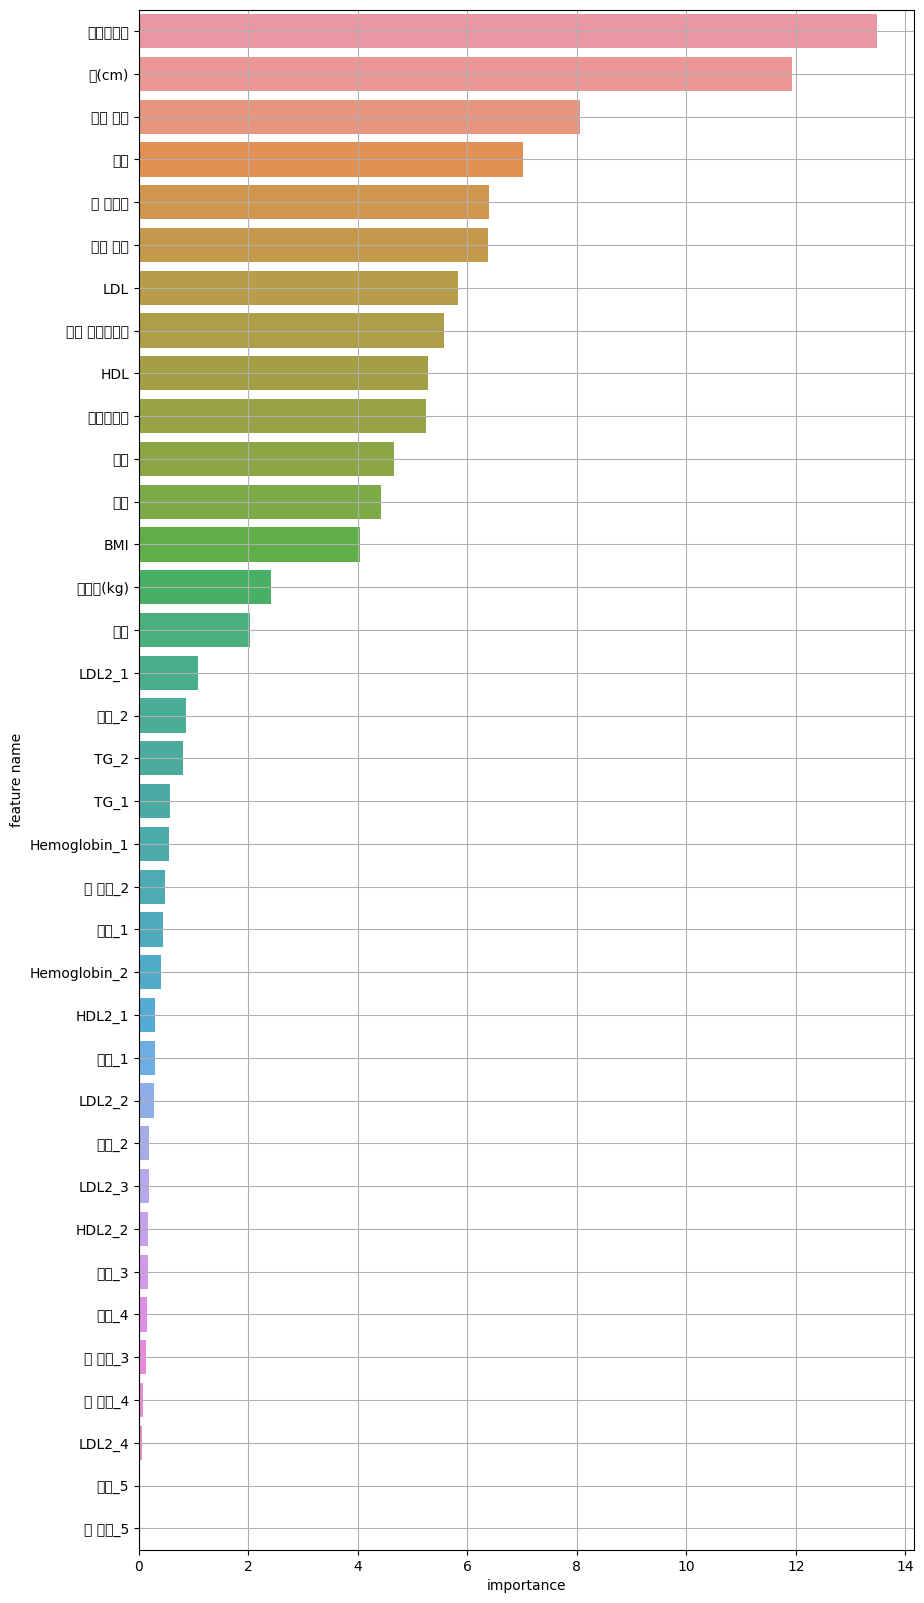

In [16]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df
plot_feature_importance(model.feature_importances_,x_train.columns,result_only = False)

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)
accuracy_score(y_valid,y_pred)

0.7464285714285714

In [ ]:
##############################################################################################################
pd.options.display.max_columns = 50

In [ ]:
data['비만'] = pd.cut(data['BMI'], bins =[0,18.5, 23, 25,30,35,100] , labels = [0,1,2,3,4,5])
data['당뇨'] = pd.cut(data['공복 혈당'], bins =[0,100, 125,10000] , labels = [0,1,2])
data['TG'] = pd.cut(data['중성 지방'], bins =[0,150, 200,10000] , labels = [0,1,2])
# data['Total Cholesterol'] = pd.cut(data['콜레스테롤'], bins =[0,200,240,10000] , labels = [0,1,2])
data = data.rename(columns={'고밀도지단백':'HDL','저밀도지단백':'LDL'})
# data['HDL2'] = pd.cut(data['HDL'], bins =[0,40,60,10000] , labels = [0,1,2])
# data['LDL2'] = pd.cut(data['LDL'], bins =[0,100,130,160,190,10000] , labels = [0,1,2,3,4])
# data['Hemoglobin'] = pd.cut(data['헤모글로빈'], bins =[0,13,16.5,10000] , labels = [0,1,2])

# firstb = data[['충치','비만','당뇨','TG','Total Cholesterol','HDL2','LDL2','Hemoglobin','label','ID','요 단백']]
# x_ = data.drop(['충치','비만','당뇨','TG','Total Cholesterol','HDL2','LDL2','Hemoglobin','label','ID','요 단백'],axis=1)

firstb = data[['충치','비만','당뇨','TG','label','ID']]
x_ = data.drop(['충치','비만','당뇨','TG','label','ID'],axis=1)

scaler = StandardScaler()
scaler.fit(x_)

x_train_ = scaler.transform(x_)
x_train = pd.DataFrame(x_train_,index=x_.index,columns=x_.columns)
data = pd.concat([x_train,firstb],axis=1)

# data = pd.get_dummies(data,columns=['요 단백'],drop_first=True)
# data = pd.get_dummies(data,columns=['비만'],drop_first=True)
# data = pd.get_dummies(data,columns=['당뇨'],drop_first=True)
# data = pd.get_dummies(data,columns=['Total Cholesterol'],drop_first=True)
# data = pd.get_dummies(data,columns=['HDL2'],drop_first=True)
# data = pd.get_dummies(data,columns=['LDL2'],drop_first=True)
# data = pd.get_dummies(data,columns=['Hemoglobin'],drop_first=True)
data = pd.get_dummies(data,columns=['TG'],drop_first=True)

data = data.drop('ID',axis=1)

data

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,...,LDL,헤모글로빈,요 단백,간 효소율,충치,비만,당뇨,label,TG_1,TG_2
0,-0.743896,0.569119,0.313393,0.021583,0.206523,-0.063037,-0.627309,-0.637839,1.718802,0.378015,...,0.111359,0.823006,-0.213909,0.890457,1,2,0,1,0,0
1,-0.329403,-1.612011,-0.842429,0.084410,-0.027232,3.486728,-0.740688,-0.313134,-1.179684,1.479825,...,1.643003,-1.837954,-0.213909,0.705573,0,2,2,0,0,0
2,1.328568,0.569119,-1.227703,-1.954603,-0.611621,-0.157697,-0.627309,-0.894897,-0.351545,-1.467516,...,-0.630531,0.433597,-0.213909,-0.241957,0,0,0,0,0,0
3,-0.329403,-1.612011,-1.612977,-1.183548,-1.196009,-0.347018,-0.627309,-1.097838,-0.765614,-0.530978,...,-0.127961,-0.799530,-0.213909,0.081590,0,1,0,0,0,0
4,0.914075,-1.066728,-0.071881,0.832619,-0.027232,-0.583669,-0.400552,-0.434898,0.062524,0.956465,...,0.853249,-0.539925,-0.213909,0.405137,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-1.572882,0.569119,-0.071881,-0.472463,1.141544,-0.583669,-0.060415,0.187453,1.304733,-0.365706,...,-0.080097,0.173992,-0.213909,0.821126,0,1,0,0,0,0
6996,1.328568,0.023837,-0.071881,-0.075513,-0.260988,-0.583669,-0.060415,-0.610780,0.062524,-0.365706,...,-0.295484,-0.215417,-0.213909,0.751794,0,2,0,1,0,0
6997,-0.329403,1.659684,2.625037,1.917808,0.440278,-0.110367,-0.173794,-0.543133,0.062524,-0.530978,...,-0.199756,0.628302,-0.213909,-0.334399,0,4,0,0,0,0
6998,1.328568,-1.612011,-0.842429,0.084410,-0.962253,-0.489009,1.300132,0.458041,-1.179684,-1.109428,...,-0.941646,-0.150516,-0.213909,-0.334399,0,2,0,0,1,0


In [ ]:
test['비만'] = pd.cut(test['BMI'], bins =[0,18.5, 23, 25,30,35,100] , labels = [0,1,2,3,4,5])
test['당뇨'] = pd.cut(test['공복 혈당'], bins =[0,100, 125,10000] , labels = [0,1,2])
test['TG'] = pd.cut(test['중성 지방'], bins =[0,150, 200,10000] , labels = [0,1,2])
# test['Total Cholesterol'] = pd.cut(test['콜레스테롤'], bins =[0,200,240,10000] , labels = [0,1,2])
test = test.rename(columns={'고밀도지단백':'HDL','저밀도지단백':'LDL'})
# test['HDL2'] = pd.cut(test['HDL'], bins =[0,40,60,10000] , labels = [0,1,2])
# test['LDL2'] = pd.cut(test['LDL'], bins =[0,100,130,160,190,10000] , labels = [0,1,2,3,4])
# test['Hemoglobin'] = pd.cut(test['헤모글로빈'], bins =[0,13,16.5,10000] , labels = [0,1,2])

# firstb = test[['충치','비만','당뇨','TG','Total Cholesterol','HDL2','LDL2','Hemoglobin','ID','요 단백']]
# x_ = test.drop(['충치','비만','당뇨','TG','Total Cholesterol','HDL2','LDL2','Hemoglobin','ID','요 단백'],axis=1)

firstb = test[['충치','비만','당뇨','TG','ID']]
x_ = test.drop(['충치','비만','당뇨','TG','ID'],axis=1)

scaler = StandardScaler()
scaler.fit(x_)

x_train_ = scaler.transform(x_)
x_train = pd.DataFrame(x_train_,index=x_.index,columns=x_.columns)
test = pd.concat([x_train,firstb],axis=1)

# test = pd.get_dummies(test,columns=['요 단백'],drop_first=True)
# test = pd.get_dummies(test,columns=['비만'],drop_first=True)
# test = pd.get_dummies(test,columns=['당뇨'],drop_first=True)
# test = pd.get_dummies(test,columns=['Total Cholesterol'],drop_first=True)
# test = pd.get_dummies(test,columns=['HDL2'],drop_first=True)
# test = pd.get_dummies(test,columns=['LDL2'],drop_first=True)
# test = pd.get_dummies(test,columns=['Hemoglobin'],drop_first=True)
test = pd.get_dummies(test,columns=['TG'],drop_first=True)

test = test.drop('ID',axis=1)

test

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,HDL,LDL,헤모글로빈,요 단백,간 효소율,충치,비만,당뇨,TG_1,TG_2
0,-0.372382,0.069539,-0.835591,-1.143675,-0.276329,-0.054058,0.183970,-0.734061,-1.785419,0.898841,0.097545,1.090302,-0.580429,-0.219749,1.104100,1,1,0,0,0
1,1.655841,-2.126423,-1.235651,-0.094886,-1.346333,-0.004539,1.514411,-0.412360,-1.326914,0.076557,0.503135,0.005181,-1.532333,-0.219749,-0.289532,0,2,0,0,0
2,-0.372382,-0.479452,0.764647,1.522241,-0.008828,0.292573,-1.257340,1.461897,-1.326914,-0.774081,-0.510841,-1.134195,0.308015,-0.219749,0.340466,0,3,1,0,1
3,-1.183670,1.716510,1.964826,1.076945,0.927426,-1.044430,-0.037770,1.266079,0.048602,-0.008506,-0.172849,-0.455995,0.371475,-0.219749,-0.499531,0,3,0,0,1
4,0.438907,-1.028442,-0.835591,-0.355619,-0.677580,0.837277,2.401371,0.161107,0.507107,0.927196,0.570733,0.574870,0.244555,-0.219749,-0.575895,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.372382,0.618529,1.964826,2.061284,-0.410079,-0.252132,1.625281,0.259016,0.965612,0.672004,-0.172849,0.601998,-0.199667,-0.219749,-0.824076,0,4,0,0,0
2996,-1.589315,1.167519,1.164707,0.590635,-0.008828,-0.202614,0.516581,-0.384386,-0.409904,-0.859145,-0.713637,-0.401739,-0.453508,-0.219749,-0.614076,0,3,0,0,0
2997,0.033263,-1.028442,-0.435532,0.253734,0.526175,-0.549244,-1.479080,-1.069748,-2.243924,-0.320407,0.232741,-0.021947,-1.151572,-0.219749,0.130467,1,2,0,0,0
2998,-0.778026,1.167519,1.964826,1.548608,0.927426,-0.252132,-0.370380,0.203068,-0.409904,-0.972563,-0.916432,-0.645891,1.069539,-0.219749,-0.709531,0,3,0,0,0


In [ ]:
data = data.astype({'비만':'float','당뇨':'float'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   나이        7000 non-null   float64
 1   키(cm)     7000 non-null   float64
 2   몸무게(kg)   7000 non-null   float64
 3   BMI       7000 non-null   float64
 4   시력        7000 non-null   float64
 5   공복 혈당     7000 non-null   float64
 6   혈압        7000 non-null   float64
 7   중성 지방     7000 non-null   float64
 8   혈청 크레아티닌  7000 non-null   float64
 9   콜레스테롤     7000 non-null   float64
 10  HDL       7000 non-null   float64
 11  LDL       7000 non-null   float64
 12  헤모글로빈     7000 non-null   float64
 13  요 단백      7000 non-null   float64
 14  간 효소율     7000 non-null   float64
 15  충치        7000 non-null   int64  
 16  비만        7000 non-null   float64
 17  당뇨        7000 non-null   float64
 18  label     7000 non-null   int64  
 19  TG_1      7000 non-null   uint8  
 20  TG_2      7000 non-null   uint

In [ ]:
test = test.astype({'비만':'float','당뇨':'float'})

In [ ]:
x = data.drop('label',axis=1)
y = data['label']

x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)
accuracy_score(y_valid,y_pred)

0.7378571428571429

In [ ]:
model = CatBoostClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)
accuracy_score(y_valid,y_pred)

Learning rate set to 0.021499
0:	learn: 0.6842375	total: 4.09ms	remaining: 4.09s
1:	learn: 0.6751313	total: 7.93ms	remaining: 3.96s
2:	learn: 0.6672012	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6588696	total: 15.5ms	remaining: 3.86s
4:	learn: 0.6512748	total: 19.3ms	remaining: 3.83s
5:	learn: 0.6439190	total: 23.5ms	remaining: 3.88s
6:	learn: 0.6374360	total: 31ms	remaining: 4.39s
7:	learn: 0.6316118	total: 40.3ms	remaining: 5s
8:	learn: 0.6260750	total: 47ms	remaining: 5.17s
9:	learn: 0.6197617	total: 52.3ms	remaining: 5.18s
10:	learn: 0.6142587	total: 56ms	remaining: 5.04s
11:	learn: 0.6094057	total: 61.8ms	remaining: 5.09s
12:	learn: 0.6043454	total: 65.7ms	remaining: 4.98s
13:	learn: 0.5996550	total: 69.4ms	remaining: 4.89s
14:	learn: 0.5961261	total: 73.1ms	remaining: 4.8s
15:	learn: 0.5917282	total: 77.8ms	remaining: 4.78s
16:	learn: 0.5871552	total: 81.8ms	remaining: 4.73s
17:	learn: 0.5834241	total: 85ms	remaining: 4.64s
18:	learn: 0.5797528	total: 89ms	remaining: 4.59s
19:	le

0.7364285714285714

In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(20,))
hl = keras.layers.Dense(16,activation='relu')(il)
hl = keras.layers.BatchNormalization()(hl)
# hl = keras.layers.Dropout(0.2)(hl)
hl = keras.layers.Dense(32,activation='relu')(hl)
hl = keras.layers.Dense(8,activation='relu')(hl)
ol = keras.layers.Dense(1,activation='sigmoid')(hl)

model = keras.models.Model(il,ol)
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                             

In [ ]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0,
                   verbose=1,
                   patience = 10,
                   restore_best_weights = True)
rl = ReduceLROnPlateau(monitor="val_loss",
                       patience=4,
                       factor=0.25,
                       verbose=1,
                       min_lr=0.0000001)
history = model.fit(x_train,y_train,callbacks=[es,rl],epochs=100,verbose=1,validation_data=[x_valid,y_valid])

Epoch 1/100
175/175 [==============================] - 3s 7ms/step - loss: 0.6082 - accuracy: 0.6405 - val_loss: 0.5411 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5308 - accuracy: 0.7023 - val_loss: 0.5039 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5182 - accuracy: 0.7061 - val_loss: 0.4967 - val_accuracy: 0.7321 - lr: 0.0010
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5121 - accuracy: 0.7163 - val_loss: 0.4972 - val_accuracy: 0.7286 - lr: 0.0010
Epoch 5/100
175/175 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.7184 - val_loss: 0.4929 - val_accuracy: 0.7357 - lr: 0.0010
Epoch 6/100
175/175 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7295 - val_loss: 0.4929 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 7/100
175/175 [==============================] - 0s 3ms/st

In [ ]:
y_pred = model.predict(test)
y_pred

94/94 [==============================] - 0s 1ms/step


array([[0.08695184],
       [0.00270868],
       [0.57778656],
       ...,
       [0.02854803],
       [0.46154544],
       [0.04084072]], dtype=float32)

In [ ]:
y_pred_ = np.where(y_pred>=0.5,1,0)
y_pred_

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
sample_submission['label'] = y_pred_
sample_submission

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,0
...,...,...
2995,TEST_2995,1
2996,TEST_2996,0
2997,TEST_2997,0
2998,TEST_2998,0


In [ ]:
sample_submission.to_csv('deep2.csv',index=False)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x,y)
y_pred = model.predict(test)
sample_submission['label'] = y_pred
sample_submission

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,1
4,TEST_0004,0
...,...,...
2995,TEST_2995,1
2996,TEST_2996,0
2997,TEST_2997,0
2998,TEST_2998,1


In [ ]:
sample_submission.to_csv('rf1.csv',index=False)

In [ ]:
####################################################################################

In [ ]:
from pycaret.classification import *
s = setup(data, target = 'label', session_id = 42,fold=10)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(7000, 21)"
4,Transformed data shape,"(7000, 28)"
5,Transformed train set shape,"(4900, 28)"
6,Transformed test set shape,"(2100, 28)"
7,Numeric features,18
8,Categorical features,2
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7253,0.8066,0.6339,0.6246,0.6286,0.4108,0.4113,5.8020
gbc,Gradient Boosting Classifier,0.7216,0.8003,0.6367,0.6180,0.6264,0.4048,0.4056,1.3440
rf,Random Forest Classifier,0.7182,0.8045,0.6150,0.6176,0.6154,0.3932,0.3939,1.7140
ada,Ada Boost Classifier,0.7149,0.7885,0.6228,0.6094,0.6154,0.3891,0.3897,0.8400
xgboost,Extreme Gradient Boosting,0.7133,0.7918,0.5961,0.6124,0.6038,0.3793,0.3796,1.3530
lightgbm,Light Gradient Boosting Machine,0.7124,0.7950,0.6256,0.6058,0.6149,0.3857,0.3864,1.1130
et,Extra Trees Classifier,0.7096,0.7967,0.5578,0.6166,0.5846,0.3625,0.3644,1.3060
ridge,Ridge Classifier,0.7037,0.0000,0.5528,0.6069,0.5777,0.3505,0.3520,0.1550
lr,Logistic Regression,0.7031,0.7837,0.5517,0.6059,0.5767,0.3490,0.3505,1.6590
lda,Linear Discriminant Analysis,0.7022,0.7843,0.5661,0.6013,0.5823,0.3515,0.3525,0.4350


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import random
import optuna
from optuna.samplers import TPESampler

In [ ]:
x = data.drop('label',axis=1)
y = data['label']

In [ ]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
      'bagging_temperature' :trial.suggest_float('bagging_temperature', 0.1, 10, log=True),
      "n_estimators":trial.suggest_int("n_estimators", 100, 3000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 50, 250),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)

  cat = CatBoostClassifier(**param)
  cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_valid,y_valid)],
          early_stopping_rounds=50,verbose=100)
  cat_pred = cat.predict(x_valid)
  accuracy = accuracy_score(y_valid, cat_pred)

  return accuracy

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2023-08-16 13:16:58,410] A new study created in memory with name: cat_parameter_opt


0:	learn: 0.6906206	test: 0.6906252	test1: 0.6910754	best: 0.6910754 (0)	total: 44.3ms	remaining: 1m 38s
100:	learn: 0.5362691	test: 0.5362948	test1: 0.5824214	best: 0.5824214 (100)	total: 2.66s	remaining: 56s
200:	learn: 0.4696883	test: 0.4697262	test1: 0.5450573	best: 0.5450573 (200)	total: 4.41s	remaining: 44.4s
300:	learn: 0.4355788	test: 0.4356199	test1: 0.5316364	best: 0.5316364 (300)	total: 5.95s	remaining: 38s
400:	learn: 0.4080647	test: 0.4081064	test1: 0.5262440	best: 0.5262440 (400)	total: 7.64s	remaining: 34.7s
500:	learn: 0.3864737	test: 0.3865133	test1: 0.5229254	best: 0.5229254 (500)	total: 9.24s	remaining: 31.8s
600:	learn: 0.3702766	test: 0.3703155	test1: 0.5230096	best: 0.5226011 (554)	total: 10.9s	remaining: 29.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5226011103
bestIteration = 554

Shrink model to first 555 iterations.


[I 2023-08-16 13:17:09,697] Trial 0 finished with value: 0.7107142857142857 and parameters: {'learning_rate': 0.005611516415334507, 'bagging_temperature': 7.969454818643936, 'n_estimators': 2223, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 170, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.7107142857142857.


0:	learn: 0.6697089	test: 0.6697392	test1: 0.6699420	best: 0.6699420 (0)	total: 3.45ms	remaining: 2.46s
100:	learn: 0.4547774	test: 0.4548152	test1: 0.5119039	best: 0.5117816 (98)	total: 324ms	remaining: 1.97s


[I 2023-08-16 13:17:10,472] Trial 1 finished with value: 0.7178571428571429 and parameters: {'learning_rate': 0.08706020878304858, 'bagging_temperature': 4.622589001020832, 'n_estimators': 715, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 108, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


200:	learn: 0.3365059	test: 0.3365392	test1: 0.5114750	best: 0.5015199 (161)	total: 644ms	remaining: 1.65s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5015198727
bestIteration = 161

Shrink model to first 162 iterations.
0:	learn: 0.6903633	test: 0.6903705	test1: 0.6906652	best: 0.6906652 (0)	total: 349ms	remaining: 8m 15s
100:	learn: 0.5486041	test: 0.5486298	test1: 0.5895353	best: 0.5895353 (100)	total: 17.2s	remaining: 3m 45s
200:	learn: 0.4767462	test: 0.4767814	test1: 0.5471072	best: 0.5471072 (200)	total: 32.7s	remaining: 3m 18s
300:	learn: 0.4312009	test: 0.4312414	test1: 0.5287478	best: 0.5287478 (300)	total: 49.6s	remaining: 3m 4s
400:	learn: 0.3962906	test: 0.3963318	test1: 0.5204609	best: 0.5204609 (400)	total: 1m 6s	remaining: 2m 49s
500:	learn: 0.3710811	test: 0.3711211	test1: 0.5173943	best: 0.5173602 (498)	total: 1m 22s	remaining: 2m 31s
600:	learn: 0.3460975	test: 0.3461364	test1: 0.5161906	best: 0.5158020 (576)	total: 1m 38s	remaining: 2m 14s
St

[I 2023-08-16 13:18:53,975] Trial 2 finished with value: 0.7092857142857143 and parameters: {'learning_rate': 0.00383962929980417, 'bagging_temperature': 0.5404103854647329, 'n_estimators': 1423, 'max_depth': 14, 'random_strength': 20, 'colsample_bylevel': 0.708540663048167, 'l2_leaf_reg': 1.7776512920172654e-05, 'min_child_samples': 9, 'max_bin': 172, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


0:	learn: 0.6603818	test: 0.6604170	test1: 0.6633160	best: 0.6633160 (0)	total: 4.38ms	remaining: 10.7s


[I 2023-08-16 13:18:54,594] Trial 3 finished with value: 0.7178571428571429 and parameters: {'learning_rate': 0.07902619549708234, 'bagging_temperature': 8.536189862866832, 'n_estimators': 2445, 'max_depth': 7, 'random_strength': 9, 'colsample_bylevel': 0.8105398159072941, 'l2_leaf_reg': 1.3210173287250643e-05, 'min_child_samples': 16, 'max_bin': 149, 'od_type': 'Iter'}. Best is trial 1 with value: 0.7178571428571429.


100:	learn: 0.4191233	test: 0.4191606	test1: 0.5312960	best: 0.5275078 (69)	total: 434ms	remaining: 10.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5275078208
bestIteration = 69

Shrink model to first 70 iterations.
0:	learn: 0.6923310	test: 0.6923328	test1: 0.6924083	best: 0.6924083 (0)	total: 20.1ms	remaining: 20.1s
100:	learn: 0.6145220	test: 0.6145598	test1: 0.6262952	best: 0.6262952 (100)	total: 1.12s	remaining: 10s
200:	learn: 0.5662789	test: 0.5663089	test1: 0.5849907	best: 0.5849907 (200)	total: 2.28s	remaining: 9.12s
300:	learn: 0.5348482	test: 0.5348814	test1: 0.5608782	best: 0.5608782 (300)	total: 3.4s	remaining: 7.94s
400:	learn: 0.5102478	test: 0.5102845	test1: 0.5430740	best: 0.5430740 (400)	total: 4.52s	remaining: 6.8s
500:	learn: 0.4940025	test: 0.4940419	test1: 0.5321431	best: 0.5321431 (500)	total: 5.66s	remaining: 5.69s
600:	learn: 0.4790496	test: 0.4790897	test1: 0.5241964	best: 0.5241964 (600)	total: 8.02s	remaining: 5.38s
700:	learn: 0.46

[I 2023-08-16 13:19:10,333] Trial 4 finished with value: 0.7028571428571428 and parameters: {'learning_rate': 0.0032927591344236173, 'bagging_temperature': 2.113705944064573, 'n_estimators': 1004, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 238, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


1000:	learn: 0.4368461	test: 0.4368865	test1: 0.5045410	best: 0.5045410 (1000)	total: 15.4s	remaining: 46.1ms
1003:	learn: 0.4366055	test: 0.4366464	test1: 0.5045193	best: 0.5045193 (1003)	total: 15.4s	remaining: 0us

bestTest = 0.5045193301
bestIteration = 1003

0:	learn: 0.6765223	test: 0.6765492	test1: 0.6764664	best: 0.6764664 (0)	total: 2.36ms	remaining: 1.58s
100:	learn: 0.5013817	test: 0.5014221	test1: 0.5244720	best: 0.5244720 (100)	total: 241ms	remaining: 1.35s
200:	learn: 0.4615651	test: 0.4616036	test1: 0.5065018	best: 0.5057080 (196)	total: 492ms	remaining: 1.14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5037953697
bestIteration = 218

Shrink model to first 219 iterations.


[I 2023-08-16 13:19:11,098] Trial 5 finished with value: 0.715 and parameters: {'learning_rate': 0.06978281265126034, 'bagging_temperature': 0.15030900645056822, 'n_estimators': 668, 'max_depth': 4, 'random_strength': 32, 'colsample_bylevel': 0.6332063738136893, 'l2_leaf_reg': 8.147757462899138e-06, 'min_child_samples': 84, 'max_bin': 121, 'od_type': 'Iter'}. Best is trial 1 with value: 0.7178571428571429.


0:	learn: 0.6921151	test: 0.6921189	test1: 0.6924786	best: 0.6924786 (0)	total: 804ms	remaining: 4m 13s
100:	learn: 0.6160638	test: 0.6161034	test1: 0.6412382	best: 0.6412382 (100)	total: 59.3s	remaining: 2m 6s
200:	learn: 0.5621374	test: 0.5621689	test1: 0.6052172	best: 0.6052172 (200)	total: 1m 55s	remaining: 1m 6s
300:	learn: 0.5205732	test: 0.5206039	test1: 0.5804486	best: 0.5804486 (300)	total: 3m 5s	remaining: 9.25s
315:	learn: 0.5120415	test: 0.5120724	test1: 0.5764543	best: 0.5764543 (315)	total: 3m 20s	remaining: 0us

bestTest = 0.5764543007
bestIteration = 315



[I 2023-08-16 13:22:33,480] Trial 6 finished with value: 0.7121428571428572 and parameters: {'learning_rate': 0.00191358804876923, 'bagging_temperature': 4.02155452669029, 'n_estimators': 316, 'max_depth': 16, 'random_strength': 77, 'colsample_bylevel': 0.5192294089205034, 'l2_leaf_reg': 1.7560829253683595e-07, 'min_child_samples': 83, 'max_bin': 192, 'od_type': 'Iter'}. Best is trial 1 with value: 0.7178571428571429.


0:	learn: 0.6921931	test: 0.6921955	test1: 0.6926351	best: 0.6926351 (0)	total: 403ms	remaining: 2m 55s
100:	learn: 0.6354817	test: 0.6355235	test1: 0.6550126	best: 0.6550126 (100)	total: 18.4s	remaining: 1m
200:	learn: 0.5853609	test: 0.5853947	test1: 0.6231612	best: 0.6231612 (200)	total: 43.9s	remaining: 51.3s
300:	learn: 0.5466575	test: 0.5466872	test1: 0.6003586	best: 0.6003586 (300)	total: 1m 3s	remaining: 28.6s
400:	learn: 0.5172487	test: 0.5172781	test1: 0.5832202	best: 0.5832202 (400)	total: 1m 22s	remaining: 7.23s
435:	learn: 0.5080739	test: 0.5081036	test1: 0.5779107	best: 0.5779107 (435)	total: 1m 28s	remaining: 0us

bestTest = 0.5779107466
bestIteration = 435



[I 2023-08-16 13:24:03,188] Trial 7 finished with value: 0.6892857142857143 and parameters: {'learning_rate': 0.001406336677771817, 'bagging_temperature': 0.5211124595788266, 'n_estimators': 436, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 115, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


0:	learn: 0.6645515	test: 0.6645783	test1: 0.6765358	best: 0.6765358 (0)	total: 87.1ms	remaining: 38.8s


[I 2023-08-16 13:24:13,659] Trial 8 finished with value: 0.6957142857142857 and parameters: {'learning_rate': 0.059487468132197734, 'bagging_temperature': 0.8798929749689022, 'n_estimators': 446, 'max_depth': 13, 'random_strength': 76, 'colsample_bylevel': 0.7367663185416977, 'l2_leaf_reg': 2.3131305726837285e-05, 'min_child_samples': 52, 'max_bin': 155, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5339695327
bestIteration = 45

Shrink model to first 46 iterations.
0:	learn: 0.6928701	test: 0.6928736	test1: 0.6929158	best: 0.6929158 (0)	total: 7.15ms	remaining: 13.9s
100:	learn: 0.6564788	test: 0.6565194	test1: 0.6626979	best: 0.6626979 (100)	total: 735ms	remaining: 13.4s
200:	learn: 0.6284648	test: 0.6285057	test1: 0.6392695	best: 0.6392695 (200)	total: 1.43s	remaining: 12.4s
300:	learn: 0.6025892	test: 0.6026222	test1: 0.6182200	best: 0.6182200 (300)	total: 2.13s	remaining: 11.6s
400:	learn: 0.5840955	test: 0.5841247	test1: 0.6038905	best: 0.6038905 (400)	total: 2.82s	remaining: 10.9s
500:	learn: 0.5674355	test: 0.5674639	test1: 0.5913672	best: 0.5913672 (500)	total: 3.54s	remaining: 10.2s
600:	learn: 0.5522601	test: 0.5522899	test1: 0.5806718	best: 0.5806718 (600)	total: 4.26s	remaining: 9.53s
700:	learn: 0.5408275	test: 0.5408599	test1: 0.5728417	best: 0.5728417 (700)	total: 4.95s	remaining: 8.79s
800:	learn:

[I 2023-08-16 13:24:32,457] Trial 9 finished with value: 0.7014285714285714 and parameters: {'learning_rate': 0.001643549747511133, 'bagging_temperature': 0.11557352816269865, 'n_estimators': 1946, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 201, 'od_type': 'IncToDec'}. Best is trial 1 with value: 0.7178571428571429.


1945:	learn: 0.4687402	test: 0.4687821	test1: 0.5359178	best: 0.5359178 (1945)	total: 18.4s	remaining: 0us

bestTest = 0.5359177769
bestIteration = 1945

Best Score: 0.7178571428571429
Best trial {'learning_rate': 0.08706020878304858, 'bagging_temperature': 4.622589001020832, 'n_estimators': 715, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 108, 'od_type': 'IncToDec'}


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = []
for train_idx, valid_idx in skf.split(data, data["label"]):
  folds.append((train_idx,valid_idx))

In [ ]:
random.seed(42)
cat_models={}


for fold in range(5):
  print(f'===================================={fold+1}============================================')
  train_idx, valid_idx = folds[fold]
  X_train = data.drop(["label"],axis=1).iloc[train_idx].values
  X_valid = data.drop(["label"],axis=1).iloc[valid_idx].values
  y_train = data["label"][train_idx].values
  y_valid = data["label"][valid_idx].values

  cat = CatBoostClassifier(**study.best_params)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=50,verbose=100)
  cat_models[fold] = cat
  print(f'================================================================================\n\n')

====================================1============================================
0:	learn: 0.6736605	test: 0.6736922	test1: 0.6741485	best: 0.6741485 (0)	total: 4.28ms	remaining: 3.06s
100:	learn: 0.4508058	test: 0.4508431	test1: 0.5243520	best: 0.5243520 (100)	total: 865ms	remaining: 5.25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5242161372
bestIteration = 101

Shrink model to first 102 iterations.


====================================2============================================
0:	learn: 0.6716397	test: 0.6716727	test1: 0.6718163	best: 0.6718163 (0)	total: 3.47ms	remaining: 2.48s
100:	learn: 0.4501204	test: 0.4501587	test1: 0.5217331	best: 0.5166049 (84)	total: 759ms	remaining: 4.61s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5166048545
bestIteration = 84

Shrink model to first 85 iterations.


====================================3============================================
0:	learn: 0.6741992	test: 0.6742325	test1: 0.6726134	be

In [ ]:
for fold in range(5):
    if fold==0:
        y_pred = cat_models[fold].predict_proba(test)/5
    elif fold==1:
        y_pred1 = cat_models[fold].predict_proba(test)/5
    elif fold==2:
        y_pred2 = cat_models[fold].predict_proba(test)/5
    elif fold==3:
        y_pred3 = cat_models[fold].predict_proba(test)/5
    elif fold==4:
        y_pred4 = cat_models[fold].predict_proba(test)/5


y_pred = y_pred + y_pred1 + y_pred2 + y_pred3 + y_pred4
y_pred

array([[0.81785374, 0.18214626],
       [0.98488299, 0.01511701],
       [0.45238641, 0.54761359],
       ...,
       [0.93957783, 0.06042217],
       [0.41835543, 0.58164457],
       [0.93764899, 0.06235101]])

In [ ]:
y_pred.argmax(axis=1)

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
sample_submission['label'] = y_pred.argmax(axis=1)
sample_submission

,ID,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,0
...,...,...
2995,TEST_2995,0
2996,TEST_2996,0
2997,TEST_2997,0
2998,TEST_2998,1


In [ ]:
sample_submission.to_csv('catopt3.csv',index=False)

In [ ]:
model = CatBoostClassifier(**study.best_params)
model.fit(x, y,early_stopping_rounds=50,verbose=100)
y_pred = model.predict(test)
y_pred

0:	learn: 0.6868133	total: 5.83ms	remaining: 4.16s
100:	learn: 0.4598915	total: 809ms	remaining: 4.92s
200:	learn: 0.3559855	total: 1.19s	remaining: 3.05s
300:	learn: 0.2744911	total: 1.59s	remaining: 2.19s
400:	learn: 0.2158142	total: 1.99s	remaining: 1.56s
500:	learn: 0.1702280	total: 2.39s	remaining: 1.02s
600:	learn: 0.1358002	total: 2.77s	remaining: 525ms
700:	learn: 0.1077078	total: 3.15s	remaining: 63ms
714:	learn: 0.1040958	total: 3.21s	remaining: 0us


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
sample_submission['label'] = y_pred
sample_submission.to_csv('cat1.csv',index=False)

In [ ]:
data

,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,...,HDL2_1,HDL2_2,LDL2_1,LDL2_2,LDL2_3,LDL2_4,Hemoglobin_1,Hemoglobin_2,TG_1,TG_2
0,-0.743896,0.569119,0.313393,0.021583,0.206523,-0.063037,-0.627309,-0.637839,1.718802,0.378015,...,0,1,1,0,0,0,1,0,0,0
1,-0.329403,-1.612011,-0.842429,0.084410,-0.027232,3.486728,-0.740688,-0.313134,-1.179684,1.479825,...,1,0,0,0,1,0,0,0,0,0
2,1.328568,0.569119,-1.227703,-1.954603,-0.611621,-0.157697,-0.627309,-0.894897,-0.351545,-1.467516,...,1,0,0,0,0,0,1,0,0,0
3,-0.329403,-1.612011,-1.612977,-1.183548,-1.196009,-0.347018,-0.627309,-1.097838,-0.765614,-0.530978,...,0,1,1,0,0,0,1,0,0,0
4,0.914075,-1.066728,-0.071881,0.832619,-0.027232,-0.583669,-0.400552,-0.434898,0.062524,0.956465,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-1.572882,0.569119,-0.071881,-0.472463,1.141544,-0.583669,-0.060415,0.187453,1.304733,-0.365706,...,1,0,1,0,0,0,1,0,0,0
6996,1.328568,0.023837,-0.071881,-0.075513,-0.260988,-0.583669,-0.060415,-0.610780,0.062524,-0.365706,...,0,1,1,0,0,0,1,0,0,0
6997,-0.329403,1.659684,2.625037,1.917808,0.440278,-0.110367,-0.173794,-0.543133,0.062524,-0.530978,...,1,0,1,0,0,0,1,0,0,0
6998,1.328568,-1.612011,-0.842429,0.084410,-0.962253,-0.489009,1.300132,0.458041,-1.179684,-1.109428,...,1,0,0,0,0,0,1,0,1,0


,feature_name,feature_importance
0,헤모글로빈,9.739612
1,간 효소율,8.090503
2,공복 혈당,7.238249
3,중성 지방,7.199316
4,LDL,7.185553
5,혈압,7.089831
6,시력,6.294058
7,HDL,6.127854
8,키(cm),6.065680
9,콜레스테롤,5.959871


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54756 (\N{HANGUL SYLLABLE HE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args

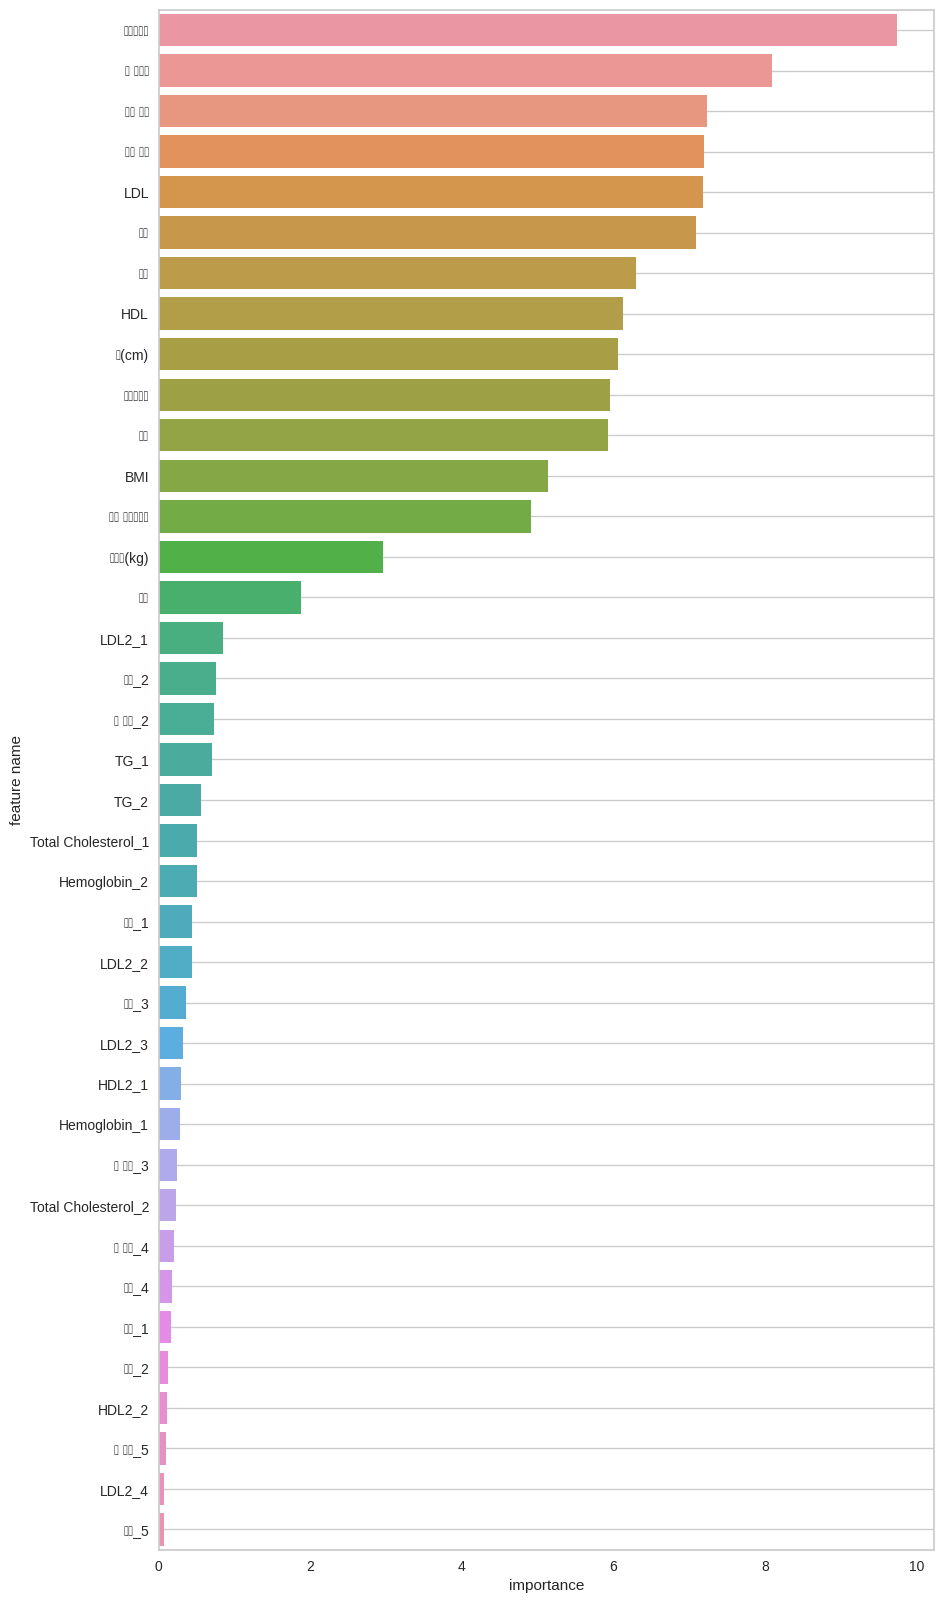

In [ ]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df
plot_feature_importance(model.feature_importances_,x.columns,result_only = False)

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=02afeb638f875a5a19f81b68c2e5c9c1d7920029123cd915114140b5a9df4e23
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Data Profiling Report")
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 44172 (\N{HANGUL SYLLAB

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_widgets()